# api

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [ ]:
api_key = 'W33QUO06NRO0R5BX374G'

In [ ]:
start = 1
end = 100000
statcode = '902Y021'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = 'KOR'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_unemployment_kr = df1[['TIME', 'DATA_VALUE']]
df_unemployment_kr.rename(columns={'DATA_VALUE':'umemplyoment_kr'},inplace=True)
df_unemployment_kr
df_unemployment_kr.to_csv('unemployment_kr.csv', index=False, encoding='utf-8-sig')

In [ ]:
start = 1
end = 100000
statcode = '902Y021'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = 'USA'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_unemployment_us = df1[['TIME', 'DATA_VALUE']]
df_unemployment_us.rename(columns={'DATA_VALUE':'umemplyoment_us'},inplace=True)
df_unemployment_us
df_unemployment_us.to_csv('unemployment_us.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_unemployment = pd.merge(df_unemployment_kr, df_unemployment_us, on='TIME', how='inner')
df_unemployment.to_csv('unemployment.csv', index=False, encoding='utf-8-sig')
df_unemployment

,TIME,umemplyoment_kr,umemplyoment_us
0,199001,2.6,5.4
1,199002,2.5,5.3
2,199003,2.2,5.2
3,199004,2.2,5.4
4,199005,2.4,5.4
...,...,...,...
417,202410,2.7,4.1
418,202411,2.7,4.2
419,202412,3.7,4.1
420,202501,2.9,4


In [ ]:
import pandas as pd
from datetime import timedelta

# 예시: merged_df의 TIME이 'YYYYMM' 형식이라고 가정
# 먼저 TIME을 날짜형으로 변환
df_unemployment['TIME'] = pd.to_datetime(df_unemployment['TIME'], format='%Y%m')

# 월별 데이터를 일별로 확장
daily_rows = []

for _, row in df_unemployment.iterrows():
    start_date = row['TIME']
    # 해당 월의 마지막 날짜 구하기
    next_month = (start_date + pd.offsets.MonthBegin(1))
    end_date = next_month - timedelta(days=1)

    # 일별 날짜 생성
    date_range = pd.date_range(start=start_date, end=end_date)

    for date in date_range:
        new_row = row.copy()
        new_row['DATE'] = date
        daily_rows.append(new_row)

# 새 데이터프레임 생성
unemployment_df = pd.DataFrame(daily_rows)

unemployment_df = unemployment_df.reset_index(drop=True)
unemployment_df.drop(columns=['TIME'],inplace=True)
# 결과 확인
unemployment_df


unemployment_df.to_csv('daily_unrate.csv', index=False, encoding='utf-8-sig')

In [ ]:
start = 1
end = 100000
statcode = '901Y009'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = '0'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_cpi = df1[['TIME', 'DATA_VALUE']]
df_cpi.rename(columns={'DATA_VALUE':'CPI'},inplace=True)
df_cpi
#df_cpi.to_csv('CPI.csv', index=False, encoding='utf-8-sig')

<ipython-input-10-d45e26cf9178>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi.rename(columns={'DATA_VALUE':'CPI'},inplace=True)


,TIME,CPI
0,196501,2.493
1,196502,2.548
2,196503,2.553
3,196504,2.593
4,196505,2.645
...,...,...
718,202411,114.4
719,202412,114.91
720,202501,115.71
721,202502,116.08


In [ ]:
start = 1
end = 100000
statcode = '404Y014'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = '*AA'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_ppi = df1[['TIME', 'DATA_VALUE']]
#df_ppi.rename(columns={'DATA_VALUE':'PPI'},inplace=True)
df_ppi
#df_ppi.to_csv('PPI.csv', index=False, encoding='utf-8-sig')




,TIME,DATA_VALUE
0,196501,4.88
1,196502,4.92
2,196503,4.88
3,196504,4.88
4,196505,4.98
...,...,...
717,202410,119.01
718,202411,119.1
719,202412,119.52
720,202501,120.27


In [ ]:
# API 정보
stat_code = "901Y009"
item_codes = {
    "A": "식료품 및 비주류음료",
    "B": "주류 및 담배",
    "C": "의",
    "D": "주",
    "E": "가정용품"
}
start_date = "196501"
end_date = "202512"

# 항목별 데이터프레임 저장 리스트
dfs = []

for code, name in item_codes.items():
    url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/100000/{stat_code}/M/{start_date}/{end_date}/{code}"
    res = requests.get(url)
    data = res.json()

    if "StatisticSearch" in data and "row" in data["StatisticSearch"]:
        df = pd.DataFrame(data["StatisticSearch"]["row"])
        df = df[["TIME", "DATA_VALUE"]]
        df.rename(columns={"DATA_VALUE": name}, inplace=True)
        dfs.append(df)

# 데이터 병합
df_merged = dfs[0]
for df in dfs[1:]:
    df_merged = pd.merge(df_merged, df, on="TIME", how="outer")

# 최종 결과 출력
print(df_merged)

       TIME 식료품 및 비주류음료 주류 및 담배       의       주    가정용품
0    198501      20.259  22.027  32.802  30.604  43.519
1    198502      20.654  22.027  32.802  30.634  44.008
2    198503      20.487  22.027  32.834  30.697  44.272
3    198504      20.467  22.226  32.834  30.915  44.317
4    198505      20.737  22.315  32.834  31.133  44.361
..      ...         ...     ...     ...     ...     ...
478  202411      121.32  104.81  115.48  115.48  114.99
479  202412      123.61  104.58  115.49  115.67  115.84
480  202501      125.13  104.61  115.46  115.87  116.17
481  202502      126.45  104.69  115.86  116.47  116.61
482  202503      127.26  104.72  115.87  116.25  116.27

[483 rows x 6 columns]


In [ ]:
df_merged = pd.merge(df_cpi, df_ppi, on='TIME', how='inner')
df_merged.to_csv('merged.csv', index=False, encoding='utf-8-sig')
df_merged

,TIME,CPI,PPI
0,196501,2.493,4.88
1,196502,2.548,4.92
2,196503,2.553,4.88
3,196504,2.593,4.88
4,196505,2.645,4.98
...,...,...,...
717,202410,114.69,119.01
718,202411,114.4,119.1
719,202412,114.91,119.52
720,202501,115.71,120.27


In [ ]:
import pandas as pd
from datetime import timedelta

# 예시: merged_df의 TIME이 'YYYYMM' 형식이라고 가정
# 먼저 TIME을 날짜형으로 변환
df_merged['TIME'] = pd.to_datetime(df_merged['TIME'], format='%Y%m')

# 월별 데이터를 일별로 확장
daily_rows = []

for _, row in df_merged.iterrows():
    start_date = row['TIME']
    # 해당 월의 마지막 날짜 구하기
    next_month = (start_date + pd.offsets.MonthBegin(1))
    end_date = next_month - timedelta(days=1)

    # 일별 날짜 생성
    date_range = pd.date_range(start=start_date, end=end_date)

    for date in date_range:
        new_row = row.copy()
        new_row['DATE'] = date
        daily_rows.append(new_row)

# 새 데이터프레임 생성
daily_df = pd.DataFrame(daily_rows)

daily_df = daily_df.reset_index(drop=True)
daily_df.drop(columns=['TIME'],inplace=True)
# 결과 확인
daily_df


daily_df.to_csv('daily.csv', index=False, encoding='utf-8-sig')

In [ ]:
final = pd.read_csv('/content/new_1.csv')

In [ ]:
print(final.columns)

Index(['DATE', 'GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)',
       '국고채(10년)(%)', '뉴스심리지수', '경제심리지수', '수출금액지수', '수입금액지수', '수출물가지수(원화기준)',
       '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)', '수입물가지수(계약통화기준)',
       '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리',
       'CD(91일)', '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI',
       '원/미국달러(매매기준율)', '일본엔/달러', '달러/유로', '미국기준금리'],
      dtype='object')


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23845 entries, 0 to 23844
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              23845 non-null  object 
 1   GDP(십억원)          23845 non-null  float64
 2   GNI(십억원)          23845 non-null  float64
 3   GDP_GROWTH(%)     23754 non-null  float64
 4   KOSPI             11059 non-null  float64
 5   국고채(3년)(%)        9649 non-null   float64
 6   국고채(10년)(%)       8883 non-null   float64
 7   뉴스심리지수            7408 non-null   float64
 8   경제심리지수            8139 non-null   float64
 9   수출금액지수            13618 non-null  float64
 10  수입금액지수            13618 non-null  float64
 11  수출물가지수(원화기준)      19827 non-null  float64
 12  수출물가지수(계약통화기준)    19827 non-null  float64
 13  수출물가지수(달러기준)      19827 non-null  float64
 14  수입물가지수(원화기준)      19827 non-null  float64
 15  수입물가지수(계약통화기준)    19827 non-null  float64
 16  수입물가지수(달러기준)      19827 non-null  float6

In [ ]:
final.loc[:, ['DATE','기준금리']]

,DATE,기준금리
0,1960-01-01,NaN
1,1960-01-02,NaN
2,1960-01-03,NaN
3,1960-01-04,NaN
4,1960-01-05,NaN
...,...,...
23840,2025-04-09,2.75
23841,2025-04-10,2.75
23842,2025-04-11,2.75
23843,2025-04-12,2.75


# 시각화 및 통계검정

In [ ]:
df = pd.read_csv('new_0418.csv', parse_dates=['DATE'])
df.set_index('DATE', inplace=True)


In [ ]:
# 한글 안 깨지게
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 폰트설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import matplotlib.font_manager as fm

# Assuming 'font_path.ttf' is the path to your NanumGothic font file
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

## 장단기 금리차

In [ ]:
df['term_spread'] = df['국고채(10년)(%)'] - df['국고채(3년)(%)']
df['term_spread_lag1'] = df['term_spread'].shift(1)

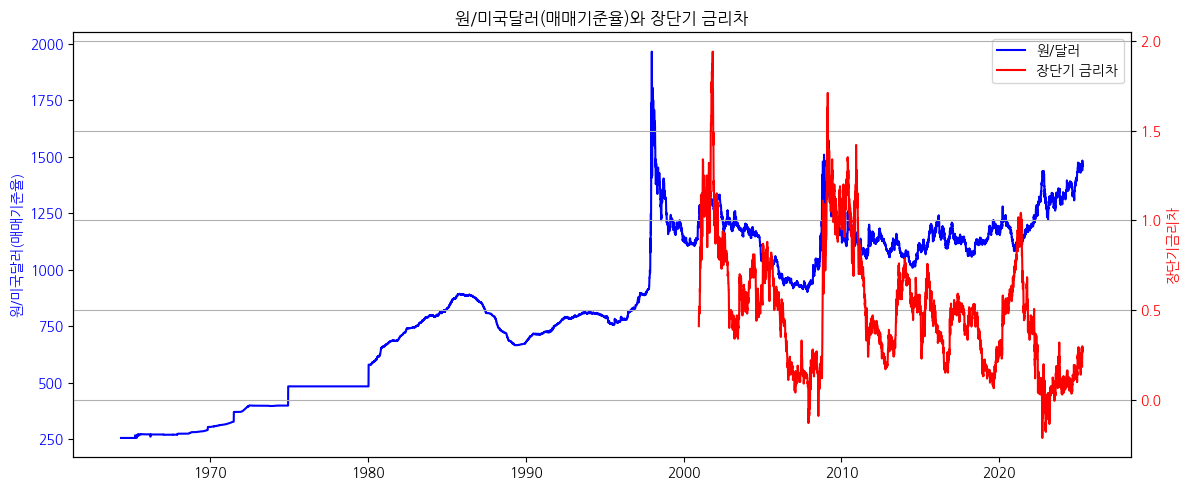

In [ ]:
plt.figure(figsize=(12, 5))

# 첫 번째 y축
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['원/미국달러(매매기준율)'], color='blue', label='원/달러')
ax1.set_ylabel('원/미국달러(매매기준율)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (공유 x축)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['term_spread'], color='red', label='장단기 금리차')
ax2.set_ylabel('장단기금리차', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 범례를 수동으로 통합
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# 제목과 레이아웃
plt.title('원/미국달러(매매기준율)와 장단기 금리차')
plt.grid(True)
plt.tight_layout()
plt.show()


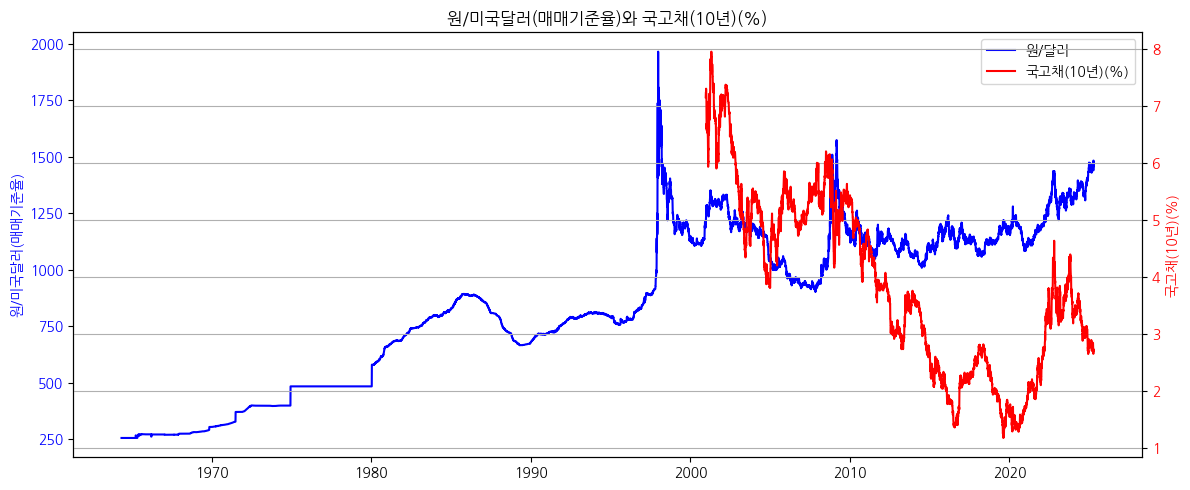

In [ ]:
plt.figure(figsize=(12, 5))

# 첫 번째 y축
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['원/미국달러(매매기준율)'], color='blue', label='원/달러')
ax1.set_ylabel('원/미국달러(매매기준율)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (공유 x축)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['국고채(10년)(%)'], color='red', label='국고채(10년)(%)')
ax2.set_ylabel('국고채(10년)(%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 범례를 수동으로 통합
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# 제목과 레이아웃
plt.title('원/미국달러(매매기준율)와 국고채(10년)(%)')
plt.grid(True)
plt.tight_layout()
plt.show()

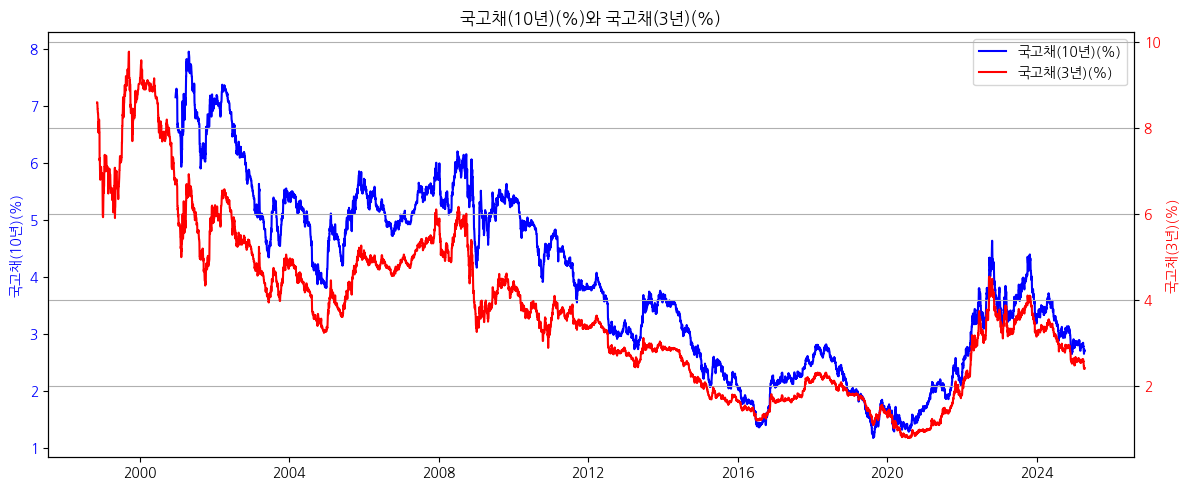

In [ ]:
plt.figure(figsize=(12, 5))

# 첫 번째 y축
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['국고채(10년)(%)'], color='blue', label='국고채(10년)(%)')
ax1.set_ylabel('국고채(10년)(%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (공유 x축)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['국고채(3년)(%)'], color='red', label='국고채(3년)(%)')
ax2.set_ylabel('국고채(3년)(%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 범례를 수동으로 통합
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# 제목과 레이아웃
plt.title('국고채(10년)(%)와 국고채(3년)(%)')
plt.grid(True)
plt.tight_layout()
plt.show()

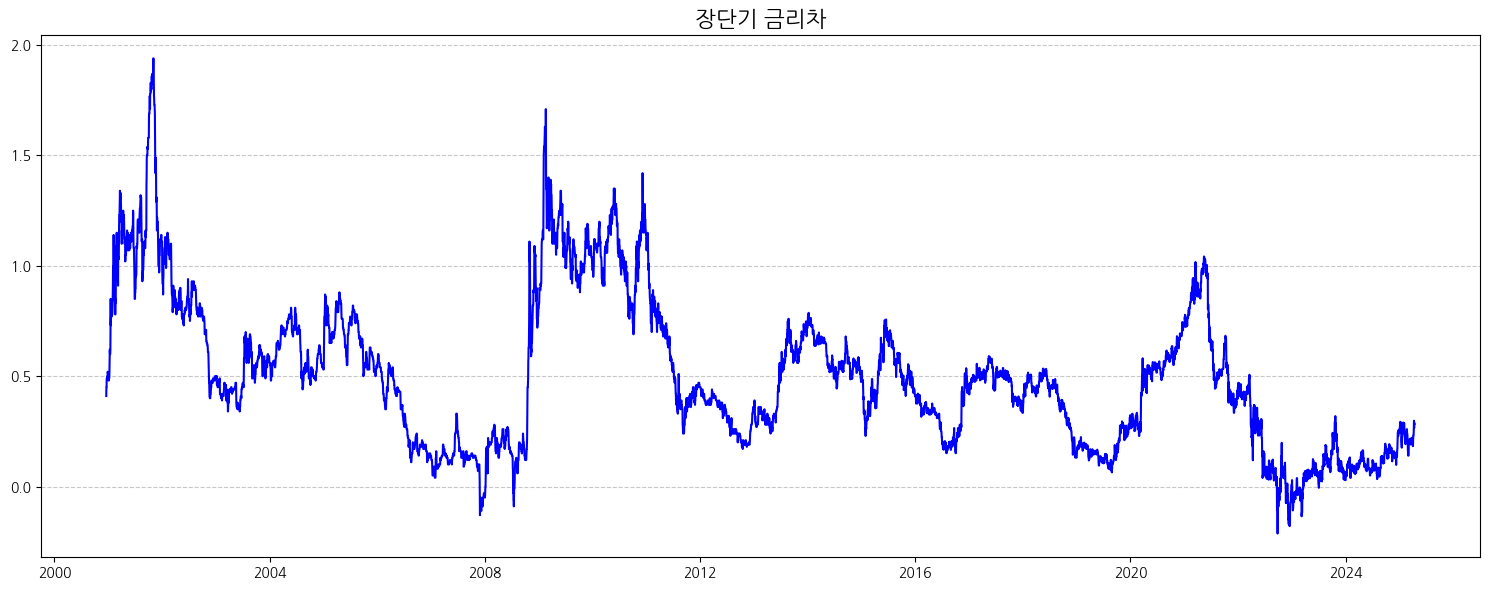

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['term_spread'], color='blue', label='장단기 금리차')
plt.title("장단기 금리차", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

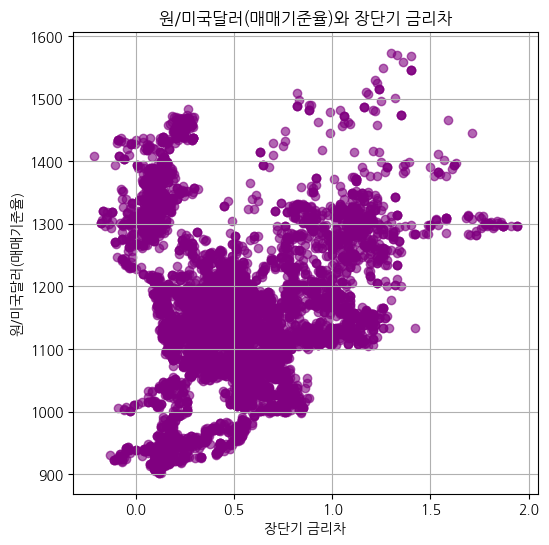

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df['term_spread'], df['원/미국달러(매매기준율)'], alpha=0.6, color='purple')
plt.xlabel("장단기 금리차")
plt.ylabel("원/미국달러(매매기준율)")
plt.title("원/미국달러(매매기준율)와 장단기 금리차")
plt.grid(True)
plt.show()

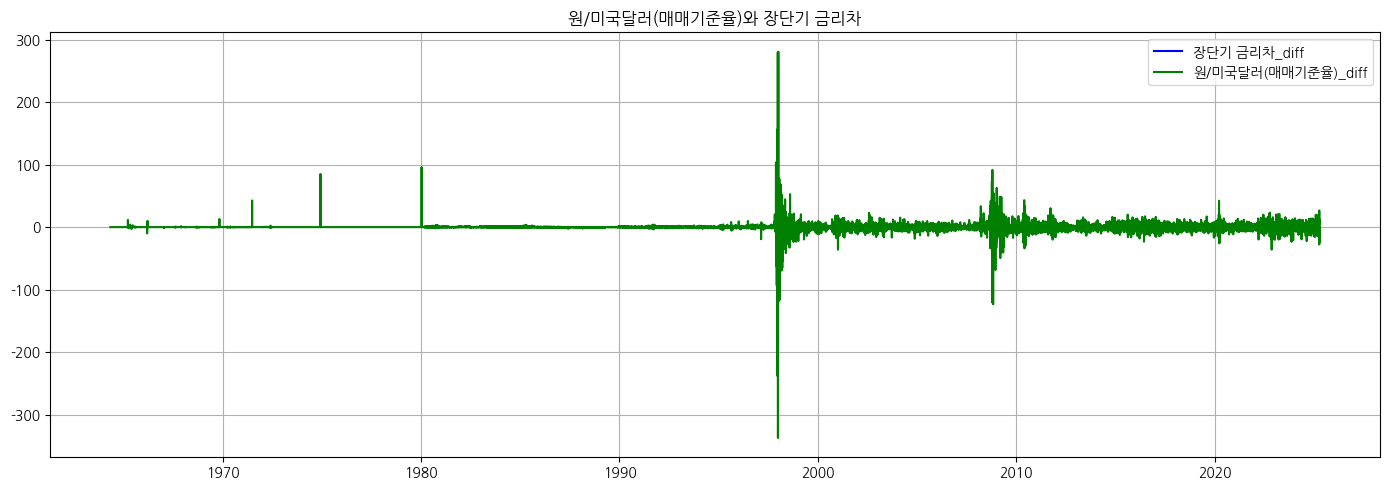

In [ ]:
df['term_spread_diff'] = df['term_spread'].diff()
df['원/미국달러(매매기준율)_diff'] = df['원/미국달러(매매기준율)'].diff()

plt.figure(figsize=(14,5))
# Reset the index to make 'DATE' a column again
df = df.reset_index()
plt.plot(df['DATE'], df['term_spread_diff'], label="장단기 금리차_diff", color='blue')
plt.plot(df['DATE'], df['원/미국달러(매매기준율)_diff'], label="원/미국달러(매매기준율)_diff", color='green')
plt.title("원/미국달러(매매기준율)와 장단기 금리차")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
correlation = df[['term_spread', '원/미국달러(매매기준율)']].corr().iloc[0,1]
print(f"상관계수: {correlation:.3f}")

상관계수: 0.129


In [ ]:
correlation = df[['term_spread_lag1', '원/미국달러(매매기준율)']].corr().iloc[0,1]
print(f"상관계수: {correlation:.3f}")

상관계수: 0.128


In [ ]:
import statsmodels.api as sm

# fx_return ~ term_spread_lag1 회귀 모델
X = sm.add_constant(df['term_spread_lag1'])
y = df['원/미국달러(매매기준율)']

model = sm.OLS(y, X, missing='drop')
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.32e-33
Time:                        04:14:42   Log-Likelihood:                -55048.
No. Observations:                8882   AIC:                         1.101e+05
Df Residuals:                    8880   BIC:                         1.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1133.9567      2.267  

In [ ]:
# fx_return ~ term_spread_lag 회귀 모델
X = sm.add_constant(df['term_spread'])
y = df['원/미국달러(매매기준율)']

model = sm.OLS(y, X, missing='drop')
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           3.85e-34
Time:                        04:14:45   Log-Likelihood:                -55053.
No. Observations:                8883   AIC:                         1.101e+05
Df Residuals:                    8881   BIC:                         1.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1133.7753      2.267    500.168      

In [ ]:
# 정상성 확인

from statsmodels.tsa.stattools import adfuller

# 예: 환율(fx)과 장단기금리차(term_spread)
for col in ['원/미국달러(매매기준율)', 'term_spread']:
    result = adfuller(df[col].dropna())
    print(f'📌 {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  → 정상성 있음' if result[1] < 0.05 else '  → 정상성 없음')
    print()

📌 원/미국달러(매매기준율) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  → 정상성 없음

📌 term_spread ADF Test:
  Test Statistic: -3.0369784086156137
  p-value: 0.031582434390117244
  → 정상성 있음



In [ ]:
#차분

df['fx_diff'] = df['원/미국달러(매매기준율)'].diff()
df['term_spread_diff'] = df['term_spread'].diff()

# 다시 ADF 테스트
for col in ['fx_diff', 'term_spread_diff']:
    result = adfuller(df[col].dropna())
    print(f'📌 {col} ADF Test (차분 후):')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  → 정상성 있음' if result[1] < 0.05 else '  → 아직도 비정상')
    print()

📌 fx_diff ADF Test (차분 후):
  Test Statistic: -18.419968514719862
  p-value: 2.177114433517963e-30
  → 정상성 있음

📌 term_spread_diff ADF Test (차분 후):
  Test Statistic: -28.82402928654234
  p-value: 0.0
  → 정상성 있음



In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# 2개 열로 구성된 DataFrame 생성
# [종속변수, 원인으로 가정한 변수] 순서
grangercausalitytests(df[['fx_diff', 'term_spread_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7183  , p=0.0299  , df_denom=8878, df_num=1
ssr based chi2 test:   chi2=4.7199  , p=0.0298  , df=1
likelihood ratio test: chi2=4.7187  , p=0.0298  , df=1
parameter F test:         F=4.7183  , p=0.0299  , df_denom=8878, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7023  , p=0.0671  , df_denom=8875, df_num=2
ssr based chi2 test:   chi2=5.4076  , p=0.0669  , df=2
likelihood ratio test: chi2=5.4060  , p=0.0670  , df=2
parameter F test:         F=2.7023  , p=0.0671  , df_denom=8875, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4890  , p=0.0585  , df_denom=8872, df_num=3
ssr based chi2 test:   chi2=7.4728  , p=0.0583  , df=3
likelihood ratio test: chi2=7.4697  , p=0.0583  , df=3
parameter F test:         F=2.4890  , p=0.0585  , df_denom=8872, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4508  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(4.7183211808199275),
    np.float64(0.029869241363975476),
    np.float64(8878.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(4.7199155673419435),
    np.float64(0.029815207088640914),
    np.int64(1)),
   'lrtest': (np.float64(4.718661783241259),
    np.float64(0.02983695482443284),
    np.int64(1)),
   'params_ftest': (np.float64(4.71832118081179),
    np.float64(0.029869241364135674),
    np.float64(8878.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.7022922034060173),
    np.float64(0.06710681109285375),
    np.float64(8875.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(5.4076292430975625),
    np.float64(0.06694963748656031),
    np.int64(2)),
   'lrtest': (np.float64(5.405983376665972),
    np.float64(0.06700475524303916),
    np.int64(2)),
   'params_ftest': (np.float64(2.7022922034035526),
    np.float64(0.06710681109293554),
    np.float64(8875.0),
    2.0)},
   array([[0., 0., 1., 0., 

In [ ]:
from statsmodels.tsa.stattools import coint

# 결측 제거
coint_data = df[['원/미국달러(매매기준율)', 'term_spread']].dropna()

# 공적분 검정 실행
score, pvalue, _ = coint(coint_data['원/미국달러(매매기준율)'], coint_data['term_spread'])

print(f"📊 공적분 검정 결과:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ✅ 공적분 관계 있음" if pvalue < 0.05 else "  ❌ 공적분 관계 없음")

📊 공적분 검정 결과:
  Test Statistic: -1.508293008074215
  p-value: 0.7579983341917779
  ❌ 공적분 관계 없음


## 경제 성장률

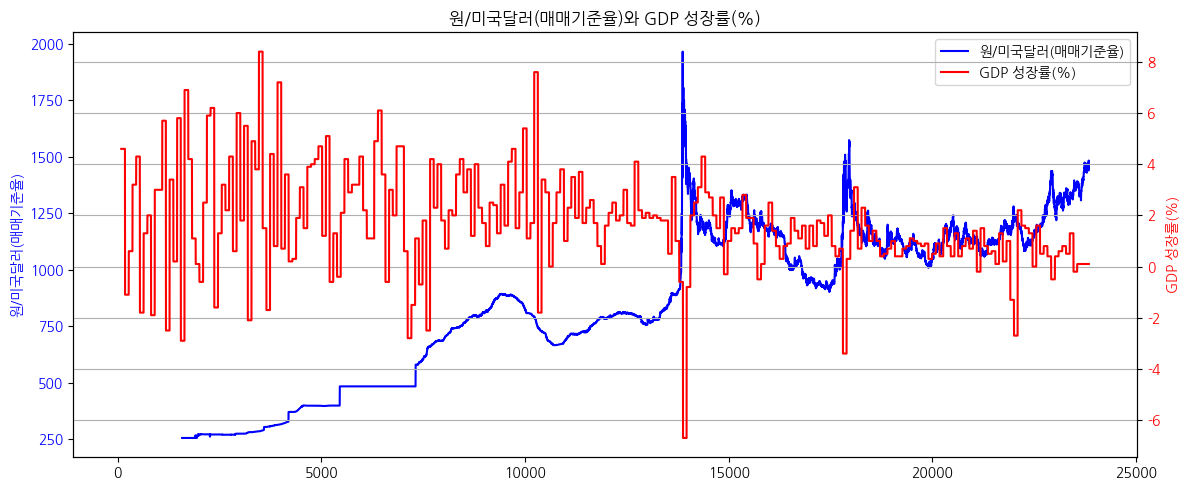

In [ ]:
plt.figure(figsize=(12, 5))

# 첫 번째 y축
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['원/미국달러(매매기준율)'], color='blue', label='원/미국달러(매매기준율)')
ax1.set_ylabel('원/미국달러(매매기준율)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (공유 x축)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['GDP_GROWTH(%)'], color='red', label='GDP 성장률(%)')
ax2.set_ylabel('GDP 성장률(%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 범례를 수동으로 통합
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# 제목과 레이아웃
plt.title('원/미국달러(매매기준율)와 GDP 성장률(%)')
plt.grid(True)
plt.tight_layout()
plt.show()


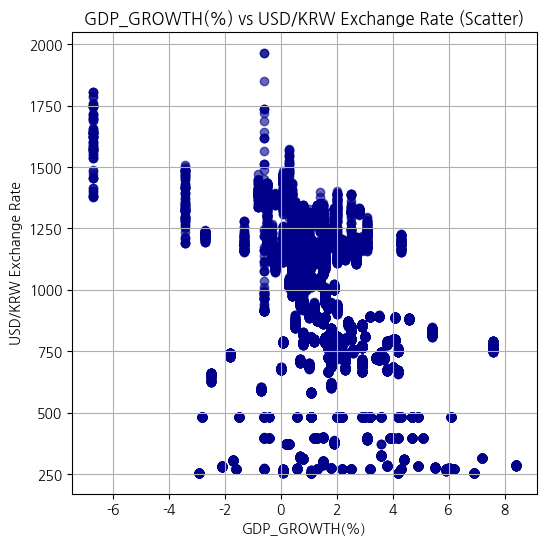

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["GDP_GROWTH(%)"], df["원/미국달러(매매기준율)"], alpha=0.6, color="darkblue")
plt.xlabel("GDP_GROWTH(%)")
plt.ylabel("USD/KRW Exchange Rate")
plt.title("GDP_GROWTH(%) vs USD/KRW Exchange Rate (Scatter)")
plt.grid(True)
plt.show()

In [ ]:
correlation = df[['GDP_GROWTH(%)', '원/미국달러(매매기준율)']].corr().iloc[0,1]
print(f"상관계수: {correlation:.3f}")

상관계수: -0.390


In [ ]:
# 정상성 확인

from statsmodels.tsa.stattools import adfuller

# 예: 환율(fx)과 장단기금리차(term_spread)
for col in ['원/미국달러(매매기준율)', 'GDP_GROWTH(%)']:
    result = adfuller(df[col].dropna())
    print(f'📌 {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  → 정상성 있음' if result[1] < 0.05 else '  → 정상성 없음')
    print()

📌 원/미국달러(매매기준율) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  → 정상성 없음

📌 GDP_GROWTH(%) ADF Test:
  Test Statistic: -10.923125521631697
  p-value: 1.0260134113865451e-19
  → 정상성 있음



In [ ]:
grangercausalitytests(df[['원/미국달러(매매기준율)', 'GDP_GROWTH(%)']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5903  , p=0.0181  , df_denom=22256, df_num=1
ssr based chi2 test:   chi2=5.5911  , p=0.0181  , df=1
likelihood ratio test: chi2=5.5904  , p=0.0181  , df=1
parameter F test:         F=5.5903  , p=0.0181  , df_denom=22256, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4447  , p=0.0868  , df_denom=22253, df_num=2
ssr based chi2 test:   chi2=4.8906  , p=0.0867  , df=2
likelihood ratio test: chi2=4.8900  , p=0.0867  , df=2
parameter F test:         F=2.4447  , p=0.0868  , df_denom=22253, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=16.1606 , p=0.0000  , df_denom=22250, df_num=3
ssr based chi2 test:   chi2=48.4969 , p=0.0000  , df=3
likelihood ratio test: chi2=48.4442 , p=0.0000  , df=3
parameter F test:         F=16.1606 , p=0.0000  , df_denom=22250, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=13.7243 

{np.int64(1): ({'ssr_ftest': (np.float64(5.590306304426078),
    np.float64(0.018068672136081387),
    np.float64(22256.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(5.591059850387315),
    np.float64(0.018052370198477483),
    np.int64(1)),
   'lrtest': (np.float64(5.590357781184139),
    np.float64(0.018059607048309598),
    np.int64(1)),
   'params_ftest': (np.float64(5.590306304432095),
    np.float64(0.018068672135991677),
    np.float64(22256.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.4447332581480588),
    np.float64(0.08677257035163527),
    np.float64(22253.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(4.890565124689658),
    np.float64(0.08670163282354068),
    np.int64(2)),
   'lrtest': (np.float64(4.890027921792353),
    np.float64(0.08672492413561772),
    np.int64(2)),
   'params_ftest': (np.float64(2.444733258148935),
    np.float64(0.08677257035155951),
    np.float64(22253.0),
    2.0)},
   array([[0., 0., 1., 0.

In [ ]:
# 결측 제거
coint_data = df[['원/미국달러(매매기준율)', 'GDP_GROWTH(%)']].dropna()

# 공적분 검정 실행
score, pvalue, _ = coint(coint_data['원/미국달러(매매기준율)'], coint_data['GDP_GROWTH(%)'])

print(f"📊 공적분 검정 결과:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ✅ 공적분 관계 있음" if pvalue < 0.05 else "  ❌ 공적분 관계 없음")

📊 공적분 검정 결과:
  Test Statistic: -4.675082197919504
  p-value: 0.0006223447562479136
  ✅ 공적분 관계 있음


In [ ]:
from scipy.stats import ttest_ind

# 환율 기준 상위 50% vs 하위 50% 그룹
median_fx = df['원/미국달러(매매기준율)'].median()
high_fx = df[df['원/미국달러(매매기준율)'] > median_fx]
low_fx = df[df['원/미국달러(매매기준율)'] <= median_fx]

# T-검정 (독립표본 t-test)
t_stat, p_val = ttest_ind(high_fx['GDP_GROWTH(%)'], low_fx['GDP_GROWTH(%)'], equal_var=False)

print(f"📌 T-통계량: {t_stat:.3f}")
print(f"📊 p-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ 환율 그룹 간 GDP 성장률 차이가 통계적으로 유의함 (p < 0.05)")
else:
    print("⚠️ 유의한 차이 없음 (p >= 0.05)")

📌 T-통계량: -55.216
📊 p-value: 0.0000
✅ 환율 그룹 간 GDP 성장률 차이가 통계적으로 유의함 (p < 0.05)


In [ ]:
import statsmodels.api as sm
import pandas as pd

# 독립 변수 (환율), 종속 변수 (GDP 성장률)
X = df['원/미국달러(매매기준율)']
y = df['GDP_GROWTH(%)']

# Check for and handle missing or infinite values in X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both X and y have the same index after dropping missing values
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# 상수항 추가 (intercept 포함)
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 결과 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          GDP_GROWTH(%)   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3981.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:15:52   Log-Likelihood:                -43874.
No. Observations:               22260   AIC:                         8.775e+04
Df Residuals:                   22258   BIC:                         8.777e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.5136      0.031    113.100

## CPI

✅ CPI가 환율에 영향을 미치는 메커니즘
1. 금리 인상 가능성 → 통화 강세
CPI가 높게 나오면, 물가 상승(인플레이션)이 심해졌다는 신호.

대부분의 중앙은행(예: 미국의 연준, 한국은행 등)은 물가 안정이 목표이므로, CPI 상승 시 금리 인상 가능성이 커짐.

금리가 오르면 해당 통화 자산의 수익률이 높아지기 때문에, 외국 자본이 몰림 → 해당 통화 강세 (환율 하락).

예:

미국 CPI 상승 → 연준이 금리 인상 시사 → 달러 강세 → 원/달러 환율 하락

2. CPI가 낮거나 하락 → 금리 인하 가능성 → 통화 약세
물가 상승률이 낮다는 건 경기 둔화 신호일 수 있음.

금리 인하 기대 → 자금 유출 → 통화 약세 (환율 상승)

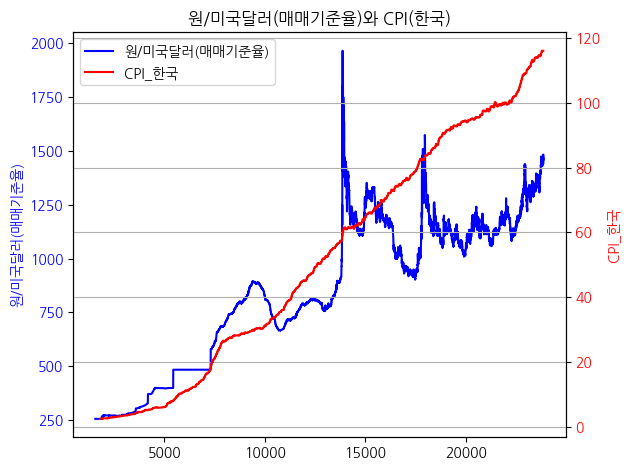

In [ ]:
# 첫 번째 y축
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['원/미국달러(매매기준율)'], color='blue', label='원/미국달러(매매기준율)')
ax1.set_ylabel('원/미국달러(매매기준율)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (공유 x축)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['CPI'], color='red', label='CPI_한국')
ax2.set_ylabel('CPI_한국', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 범례를 수동으로 통합
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# 제목과 레이아웃
plt.title('원/미국달러(매매기준율)와 CPI(한국)')
plt.grid(True)
plt.tight_layout()
plt.show()

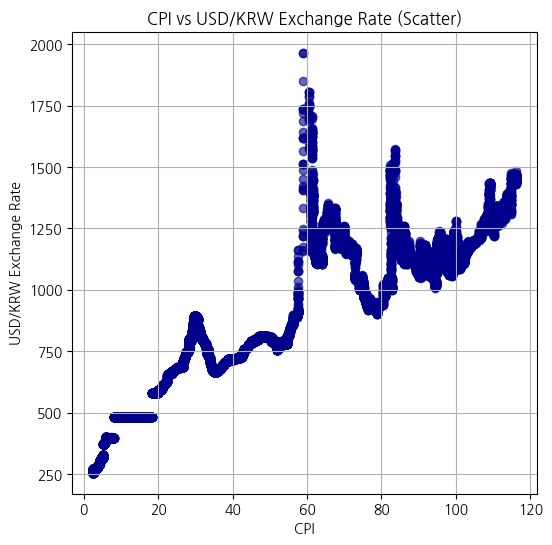

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["CPI"], df["원/미국달러(매매기준율)"], alpha=0.6, color="darkblue")
plt.xlabel("CPI")
plt.ylabel("USD/KRW Exchange Rate")
plt.title("CPI vs USD/KRW Exchange Rate (Scatter)")
plt.grid(True)
plt.show()

In [ ]:
correlation = df[['CPI', '원/미국달러(매매기준율)']].corr().iloc[0,1]
print(f"상관계수: {correlation:.3f}")

상관계수: 0.908


In [ ]:
# 정상성 확인

from statsmodels.tsa.stattools import adfuller

# 예: 환율(fx)과 장단기금리차(term_spread)
for col in ['원/미국달러(매매기준율)', 'GDP_GROWTH(%)']:
    result = adfuller(df[col].dropna())
    print(f'📌 {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  → 정상성 있음' if result[1] < 0.05 else '  → 정상성 없음')
    print()

📌 원/미국달러(매매기준율) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  → 정상성 없음

📌 GDP_GROWTH(%) ADF Test:
  Test Statistic: -10.923125521631697
  p-value: 1.0260134113865451e-19
  → 정상성 있음



In [ ]:
#차분

df['fx_diff'] = df['원/미국달러(매매기준율)'].diff()
df['CPI_diff'] = df['CPI'].diff()

# 다시 ADF 테스트
for col in ['fx_diff', 'term_spread_diff']:
    result = adfuller(df[col].dropna())
    print(f'📌 {col} ADF Test (차분 후):')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  → 정상성 있음' if result[1] < 0.05 else '  → 아직도 비정상')
    print()

📌 fx_diff ADF Test (차분 후):
  Test Statistic: -18.419968514719862
  p-value: 2.177114433517963e-30
  → 정상성 있음

📌 term_spread_diff ADF Test (차분 후):
  Test Statistic: -28.82402928654234
  p-value: 0.0
  → 정상성 있음



In [ ]:
grangercausalitytests(df[['fx_diff', 'CPI_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1276  , p=0.7210  , df_denom=22013, df_num=1
ssr based chi2 test:   chi2=0.1276  , p=0.7210  , df=1
likelihood ratio test: chi2=0.1276  , p=0.7210  , df=1
parameter F test:         F=0.1276  , p=0.7210  , df_denom=22013, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=48.9140 , p=0.0000  , df_denom=22010, df_num=2
ssr based chi2 test:   chi2=97.8502 , p=0.0000  , df=2
likelihood ratio test: chi2=97.6333 , p=0.0000  , df=2
parameter F test:         F=48.9140 , p=0.0000  , df_denom=22010, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=31.4632 , p=0.0000  , df_denom=22007, df_num=3
ssr based chi2 test:   chi2=94.4195 , p=0.0000  , df=3
likelihood ratio test: chi2=94.2176 , p=0.0000  , df=3
parameter F test:         F=31.4632 , p=0.0000  , df_denom=22007, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=25.0042 

{np.int64(1): ({'ssr_ftest': (np.float64(0.12755976817286377),
    np.float64(0.7209791179199179),
    np.float64(22013.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.12757715241419929),
    np.float64(0.7209574765441349),
    np.int64(1)),
   'lrtest': (np.float64(0.12757678277557716),
    np.float64(0.7209578638894294),
    np.int64(1)),
   'params_ftest': (np.float64(0.12755976814788952),
    np.float64(0.7209791179480908),
    np.float64(22013.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(48.91396940690387),
    np.float64(6.368001384167801e-22),
    np.float64(22010.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(97.85016233466503),
    np.float64(5.650764685329052e-22),
    np.int64(2)),
   'lrtest': (np.float64(97.63334703815053),
    np.float64(6.297788416669854e-22),
    np.int64(2)),
   'params_ftest': (np.float64(48.913969406913495),
    np.float64(6.368001384112509e-22),
    np.float64(22010.0),
    2.0)},
   array([[0., 0.

In [ ]:
# 결측 제거
coint_data = df[['원/미국달러(매매기준율)', 'CPI']].dropna()

# 공적분 검정 실행
score, pvalue, _ = coint(coint_data['원/미국달러(매매기준율)'], coint_data['CPI'])

print(f"📊 공적분 검정 결과:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ✅ 공적분 관계 있음" if pvalue < 0.05 else "  ❌ 공적분 관계 없음")

📊 공적분 검정 결과:
  Test Statistic: -4.037594806546159
  p-value: 0.006342793494731975
  ✅ 공적분 관계 있음


In [ ]:
import statsmodels.api as sm
import numpy as np

# 독립 변수: CPI
X = df['CPI']

# Check for and handle missing or infinite values in X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both X and y have the same index after dropping missing values
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# 종속 변수: 환율
# y = df['원/미국달러(매매기준율)']  # Assuming y is already defined

# 회귀 분석
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          GDP_GROWTH(%)   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     4220.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:16:12   Log-Likelihood:                -42783.
No. Observations:               22018   AIC:                         8.557e+04
Df Residuals:                   22016   BIC:                         8.559e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7666      0.020    136.423      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 1차 차분
df['fx_diff'] = df['원/미국달러(매매기준율)'].diff()
df['term_spread_diff'] = df['term_spread_lag1'].diff()

# NaN 생긴 첫 행 제거
df_diff = df.dropna(subset=['fx_diff', 'term_spread_diff'])

# 독립변수에 상수항 추가
X = sm.add_constant(df_diff['term_spread_diff'])
y = df_diff['fx_diff']

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                fx_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.463
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.227
Time:                        04:16:20   Log-Likelihood:                -28469.
No. Observations:                8881   AIC:                         5.694e+04
Df Residuals:                    8879   BIC:                         5.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0284      0.063  

## 실업률

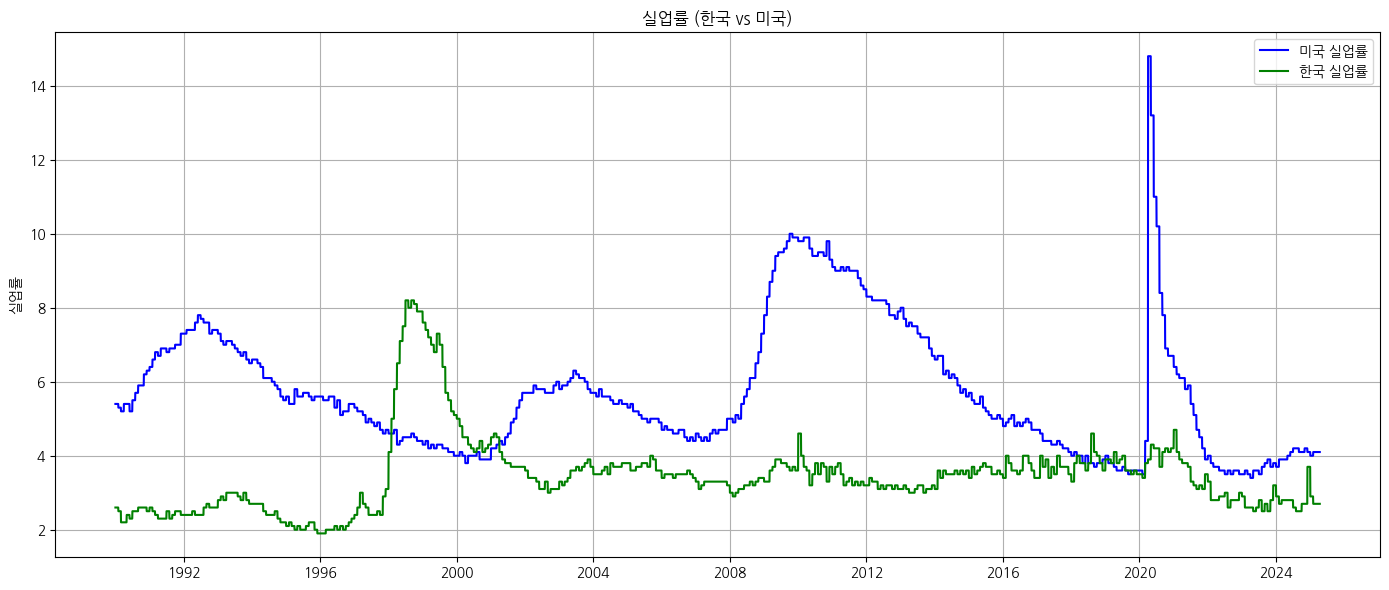

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(df['미국실업률'], label='미국 실업률', color='blue')
plt.plot(df['한국실업률'], label='한국 실업률', color='green')

# 📋 그래프 꾸미기
plt.title('실업률 (한국 vs 미국)')
plt.ylabel('실업률')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


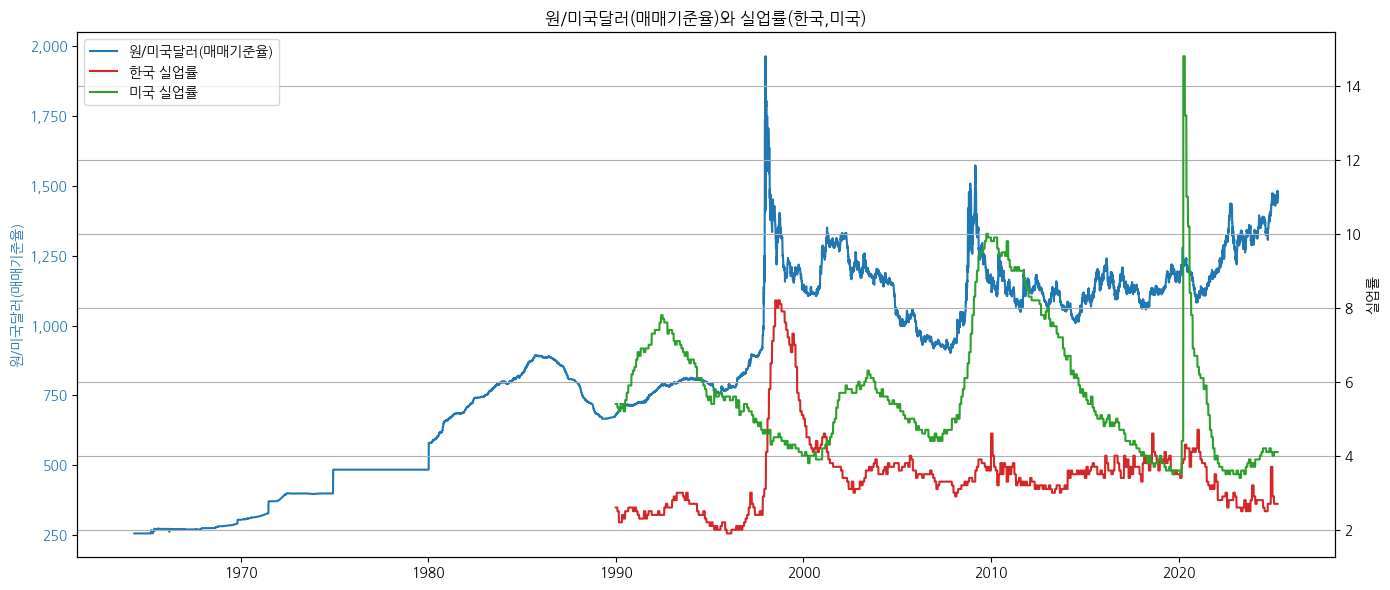

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots(figsize=(14, 6))

# 왼쪽 y축 - USD/KRW 환율
color1 = 'tab:blue'
ax1.set_ylabel('원/미국달러(매매기준율)', color=color1)
ax1.plot(df['원/미국달러(매매기준율)'], label='원/미국달러(매매기준율)', color=color1)

# 천 단위로 쉼표 표시
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax1.tick_params(axis='y', labelcolor=color1)
lines, labels = ax1.get_legend_handles_labels()

# 오른쪽 y축 - 한국 및 미국 실업률
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('실업률')
ax2.plot(df['한국실업률'], label='한국 실업률', color=color2)

color3 = 'tab:green'
ax2.plot(df['미국실업률'], label='미국 실업률', color=color3)

ax2.tick_params(axis='y')
lines2, labels2 = ax2.get_legend_handles_labels()

# 범례 통합
lines += lines2
labels += labels2

# 최종 출력
plt.title('원/미국달러(매매기준율)와 실업률(한국,미국)')
plt.legend(lines, labels, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df_corr = df[['한국실업률', '미국실업률', '원/미국달러(매매기준율)']].dropna()

# 2. 상관계수 계산 (피어슨 방식)
corr_matrix = df_corr.corr(method='pearson')

print("📊 상관계수 행렬:")
print(corr_matrix)

📊 상관계수 행렬:
                  한국실업률     미국실업률  원/미국달러(매매기준율)
한국실업률          1.000000 -0.137755       0.480133
미국실업률         -0.137755  1.000000      -0.165206
원/미국달러(매매기준율)  0.480133 -0.165206       1.000000


In [ ]:
# 정상성 확인

from statsmodels.tsa.stattools import adfuller

# 예: 환율(fx)과 장단기금리차(term_spread)
for col in ['원/미국달러(매매기준율)', '한국실업률','미국실업률']:
    result = adfuller(df[col].dropna())
    print(f'📌 {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  → 정상성 있음' if result[1] < 0.05 else '  → 정상성 없음')
    print()

📌 원/미국달러(매매기준율) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  → 정상성 없음

📌 한국실업률 ADF Test:
  Test Statistic: -2.2837297448238862
  p-value: 0.1772691574112394
  → 정상성 없음

📌 미국실업률 ADF Test:
  Test Statistic: -3.331761570925637
  p-value: 0.013517067872314494
  → 정상성 있음



In [ ]:
#차분

df['fx_diff'] = df['원/미국달러(매매기준율)'].diff()
df['한국실업률_diff'] = df['한국실업률'].diff()
df['미국실업률_diff'] = df['미국실업률'].diff()

# 다시 ADF 테스트
for col in ['fx_diff', '한국실업률_diff', '미국실업률_diff']:
    result = adfuller(df[col].dropna())
    print(f'📌 {col} ADF Test (차분 후):')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  → 정상성 있음' if result[1] < 0.05 else '  → 아직도 비정상')
    print()

📌 fx_diff ADF Test (차분 후):
  Test Statistic: -18.419968514719862
  p-value: 2.177114433517963e-30
  → 정상성 있음

📌 한국실업률_diff ADF Test (차분 후):
  Test Statistic: -20.285511906013173
  p-value: 0.0
  → 정상성 있음

📌 미국실업률_diff ADF Test (차분 후):
  Test Statistic: -19.84093406210117
  p-value: 0.0
  → 정상성 있음



In [ ]:
grangercausalitytests(df[['fx_diff', '한국실업률_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9725  , p=0.1602  , df_denom=12882, df_num=1
ssr based chi2 test:   chi2=1.9729  , p=0.1601  , df=1
likelihood ratio test: chi2=1.9728  , p=0.1602  , df=1
parameter F test:         F=1.9725  , p=0.1602  , df_denom=12882, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.5123 , p=0.0000  , df_denom=12879, df_num=2
ssr based chi2 test:   chi2=49.0435 , p=0.0000  , df=2
likelihood ratio test: chi2=48.9504 , p=0.0000  , df=2
parameter F test:         F=24.5123 , p=0.0000  , df_denom=12879, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.5950 , p=0.0000  , df_denom=12876, df_num=3
ssr based chi2 test:   chi2=46.8103 , p=0.0000  , df=3
likelihood ratio test: chi2=46.7255 , p=0.0000  , df=3
parameter F test:         F=15.5950 , p=0.0000  , df_denom=12876, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=11.9249 

{np.int64(1): ({'ssr_ftest': (np.float64(1.9724674680361671),
    np.float64(0.16021030742953019),
    np.float64(12882.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(1.9729268223603489),
    np.float64(0.16013753869904973),
    np.int64(1)),
   'lrtest': (np.float64(1.9727757923828904),
    np.float64(0.16015353526749174),
    np.int64(1)),
   'params_ftest': (np.float64(1.9724674680418102),
    np.float64(0.16021030742902662),
    np.float64(12882.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(24.512257460676416),
    np.float64(2.369583101269364e-11),
    np.float64(12879.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(49.04354765484199),
    np.float64(2.240417417295693e-11),
    np.int64(2)),
   'lrtest': (np.float64(48.95044058049098),
    np.float64(2.347182640835918e-11),
    np.int64(2)),
   'params_ftest': (np.float64(24.512257460678473),
    np.float64(2.3695831012640858e-11),
    np.float64(12879.0),
    2.0)},
   array([[0., 

In [ ]:
grangercausalitytests(df[['fx_diff', '미국실업률_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2520  , p=0.6157  , df_denom=12882, df_num=1
ssr based chi2 test:   chi2=0.2521  , p=0.6156  , df=1
likelihood ratio test: chi2=0.2520  , p=0.6156  , df=1
parameter F test:         F=0.2520  , p=0.6157  , df_denom=12882, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9584  , p=0.3835  , df_denom=12879, df_num=2
ssr based chi2 test:   chi2=1.9176  , p=0.3833  , df=2
likelihood ratio test: chi2=1.9175  , p=0.3834  , df=2
parameter F test:         F=0.9584  , p=0.3835  , df_denom=12879, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7496  , p=0.5224  , df_denom=12876, df_num=3
ssr based chi2 test:   chi2=2.2501  , p=0.5222  , df=3
likelihood ratio test: chi2=2.2499  , p=0.5222  , df=3
parameter F test:         F=0.7496  , p=0.5224  , df_denom=12876, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6398  

{np.int64(1): ({'ssr_ftest': (np.float64(0.2519923759143935),
    np.float64(0.6156842448060365),
    np.float64(12882.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.25205106067823013),
    np.float64(0.6156345511137011),
    np.int64(1)),
   'lrtest': (np.float64(0.25204859545920044),
    np.float64(0.6156362781061946),
    np.int64(1)),
   'params_ftest': (np.float64(0.2519923759253102),
    np.float64(0.6156842447980198),
    np.float64(12882.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.9584425578534896),
    np.float64(0.3835170352900633),
    np.float64(12879.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(1.9176293059064153),
    np.float64(0.38334701602442395),
    np.int64(2)),
   'lrtest': (np.float64(1.9174866119865328),
    np.float64(0.38337436764433575),
    np.int64(2)),
   'params_ftest': (np.float64(0.9584425578582116),
    np.float64(0.38351703528841774),
    np.float64(12879.0),
    2.0)},
   array([[0., 0., 1., 0.

In [ ]:
# 결측 제거
coint_data = df[['원/미국달러(매매기준율)', '한국실업률']].dropna()

# 공적분 검정 실행
score, pvalue, _ = coint(coint_data['원/미국달러(매매기준율)'], coint_data['한국실업률'])

print(f"📊 공적분 검정 결과:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ✅ 공적분 관계 있음" if pvalue < 0.05 else "  ❌ 공적분 관계 없음")

📊 공적분 검정 결과:
  Test Statistic: -2.632020742509547
  p-value: 0.22497408795290247
  ❌ 공적분 관계 없음


In [ ]:
# 결측 제거
coint_data = df[['원/미국달러(매매기준율)', '미국실업률']].dropna()

# 공적분 검정 실행
score, pvalue, _ = coint(coint_data['원/미국달러(매매기준율)'], coint_data['미국실업률'])

print(f"📊 공적분 검정 결과:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ✅ 공적분 관계 있음" if pvalue < 0.05 else "  ❌ 공적분 관계 없음")

📊 공적분 검정 결과:
  Test Statistic: -2.6713713357909032
  p-value: 0.21004375175174406
  ❌ 공적분 관계 없음


In [ ]:
import statsmodels.api as sm
import numpy as np

# 독립 변수 (미국/한국 실업률), 종속 변수 (USD/KRW)
X = df[['미국실업률', '한국실업률']]
y = df['원/미국달러(매매기준율)']

# Check for and handle missing or infinite values in X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both X and y have the same index after dropping missing values
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]


# 상수항 추가 (절편용)
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     2040.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:16:39   Log-Likelihood:                -84537.
No. Observations:               12887   AIC:                         1.691e+05
Df Residuals:                   12884   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        846.3563      7.656    110.550      0.0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ✅ 독립 변수만 추출 + 상수항 추가
X = df[['미국실업률', '한국실업률']]
X = add_constant(X)

# ✅ Replace infinite and missing values with finite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(0) # or any other appropriate value

# ✅ VIF 계산
vif_data = pd.DataFrame()
vif_data["변수"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      변수       VIF
0  const  2.081392
1  미국실업률  2.880744
2  한국실업률  2.880744
